**Day 7**: Ensemble Learning 🫐 (***live in 1.47***)

<center><h1 style="color:maroon">Ensemble Methods</h1>
    <img src="https://drive.google.com/uc?id=15nHkPumClrtZSt2QMijeok-h06bkvF0L" style="width:1300px">

    <h3><span style="color: #045F5F">Data Science & Machine Learning for Planet Earth Lecture Series</span></h3><h6><i> by Cédric M. John <span style="size:6pts">(2023)</span></i></h6></center>

## Plan for today's Lecture 🗓 

* <code>DecisionTree</code> for classification
* <code>DecisionTree</code> for regression
* Bagging algorithms: <code>RandomForest</code>
* Boosting: <code>AdaBoost</code> and <code>xgboost</code>
* Stacking algorithms

## Intended learning outcomes 👩‍🎓

* Understand variance in decision trees
* Apply <code>RandomForest</code> and <code>xgboost</code> (some of the most powerful algorithms
* Unleash the power of Ensemble methods on your problem

# Decision Trees
<br>
<center><img src="https://drive.google.com/uc?id=163OsC3pLMZwJvMrwpp_yrYwYnR8ETi-b" style="width:900px;">
<br>
 © Cédric John, 2022; Image generated with <a href="https://openai.com/blog/dall-e/">DALL-E</a><br>
    <br>Prompt: 3D rending of a glass Christmas bubble in purple colors with a tree visible in the reflection.</center>


<p>Decision Trees are hierarchical supervised learning algorithms.</p>
<ul>
<li>Classification and Regression</li>
<li>Non-linear modelling</li>
<li>Break down the data through binary decisions</li>
</ul>
<p><img src="https://drive.google.com/uc?id=15k9rgeuN6lnBIKYHyVV6Rp_xtndtznAD" style="margin:auto" width="400"/></p>

<a href="https://medium.com/analytics-vidhya/ensemble-models-bagging-boosting-c33706db0b0b">Silipo, 2020</a>


### Dataset

<span style="color:teal">**Let's start with a classic:** </span><a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">Iris Dataset (Fisher, 1936)</a><br>

<img src="https://drive.google.com/uc?id=15f4Swq-LGEXPl128WepVMWNXF5bb0VCn" style="width:1500px"/>


<h2 id="1.1-🖥-DecisionTreeClassifier">1.1 🖥 <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html"><code>DecisionTreeClassifier</code></a><a class="anchor-link" href="https://kitt.lewagon.com/karr/data-lectures.kitt/05-ML_07-Ensemble-Methods.html?title=Ensemble+Methods&amp;program_id=10#1.1-%F0%9F%96%A5-DecisionTreeClassifier">¶</a></h2>


In [1]:
# Load and prepare iris dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
X = data[['petal length (cm)', 'petal width (cm)']]
y = data.target

print(X.shape)
print(y.value_counts())

(150, 2)
target
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64


In [2]:

# Instanciate and train model
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=2)

In [3]:
import graphviz

# Export model graph
from sklearn.tree import export_graphviz
export_graphviz(tree_clf, out_file="iris_tree.dot", feature_names=X.columns,
                class_names=['0','1','2'], rounded=True, filled=True)

In [4]:
# Import model graph
with open("iris_tree.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH


## Jargon
<p><img src="https://drive.google.com/uc?id=15dAvAf5YsBN4mH2E3twjzN5hfTxctyY7" style="margin:auto" width="1000"/></p>

<a href="https://www.oreilly.com/library/view/hands-on-machine-learning/9781098125967/">Géron, 2017</a>



### Gini Index

<p>The Gini index measures the ability of each feature to <strong>separate</strong> the data.</p>
<p>It calculates the <strong>impurity</strong> of each node, between [0,1]. The lower the better</p><br>

$$Gini(node)=1-\sum{{p_i}^2}$$

<br><p>Where $p_i$ is the ratio of observation of being of class $i$ at each node</p>



<p><img src="https://drive.google.com/uc?id=15dAvAf5YsBN4mH2E3twjzN5hfTxctyY7" style="margin:auto" width="1000"/></p>

<a href="https://www.oreilly.com/library/view/hands-on-machine-learning/9781098125967/">Géron, 2017</a>


In [5]:
# Calculate gini of root node
1 - 3*(50/150)**2

0.6666666666666667

In [6]:
# Calcultate gini green leaf
1 - 0**2 - (49/54)**2 - (5/54)**2

0.1680384087791495

<h3 id='"Growing"-a-tree?'>"Growing" a tree?<a class="anchor-link" href="https://kitt.lewagon.com/karr/data-lectures.kitt/05-ML_07-Ensemble-Methods.html?title=Ensemble+Methods&amp;program_id=10#%22Growing%22-a-tree?">¶</a></h3><p>The tree structure is decided through the following steps:</p>
<ol>

<li>Start at root node containing all your dataset</li>

<li>Try various combination of <strong>(feature, threshold)</strong> tuples. Each would split your dataset into 2 child nodes</li>

<li>For each combination, compute <strong>weighted average gini index</strong> of both child nodes (weighted by number of instances)</li>

<li>Select (feature, threshold) yielding the <strong>lowest</strong> index (i.e the "purest child nodes")</li>

<li>Split dataset in two using this rule. Repeat step 2 for both subsets.</li>

<li>Stop when no feature improves node impurity (...at what risk?)</li>
</ol>


<h3 id="Predicting">Predicting</h3><ul>
<li>A new point is passed through the tree from top down until it reaches a leaf. </li>
<li>It is predicted to correspond to the most represented class in that leaf. </li>
</ul>
<p>E.g. New point: <code>X_new = [4(length), 1(width)]</code></p>
<p><img src="https://drive.google.com/uc?id=15vJKlMg97r9QGVr1njq9wtCwpfL6209F" style="margin:auto" width="1000"/></p>

<a href="https://www.oreilly.com/library/view/hands-on-machine-learning/9781098125967/">Géron, 2017</a>

In [7]:
# Let's predict a flower from the top right quardrant
print(tree_clf.predict([[4,1]]))

[1.]


/Users/shiyunwa/anaconda3/envs/ese-msc/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [8]:
# Predict proba is just the ratio of flowers in this leaf/quadrant
print(tree_clf.predict_proba([[4,1]]))

[[0.         0.90740741 0.09259259]]


/Users/shiyunwa/anaconda3/envs/ese-msc/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(



<p>⚠️ 91% is not really a "probability"</p>
<p>Trees are not <em>calibrated</em> probability classifiers as opposed to logistic regression</p>



<h3 id='Think-about-decision-trees-as-"orthogonal"-classifiers'>Think about decision trees as "orthogonal" classifiers<a class="anchor-link" href="https://kitt.lewagon.com/karr/data-lectures.kitt/05-ML_07-Ensemble-Methods.html?title=Ensemble+Methods&amp;program_id=10#Think-about-decision-trees-as-%22orthogonal%22-classifiers">¶</a></h3>


/Users/shiyunwa/anaconda3/envs/ese-msc/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


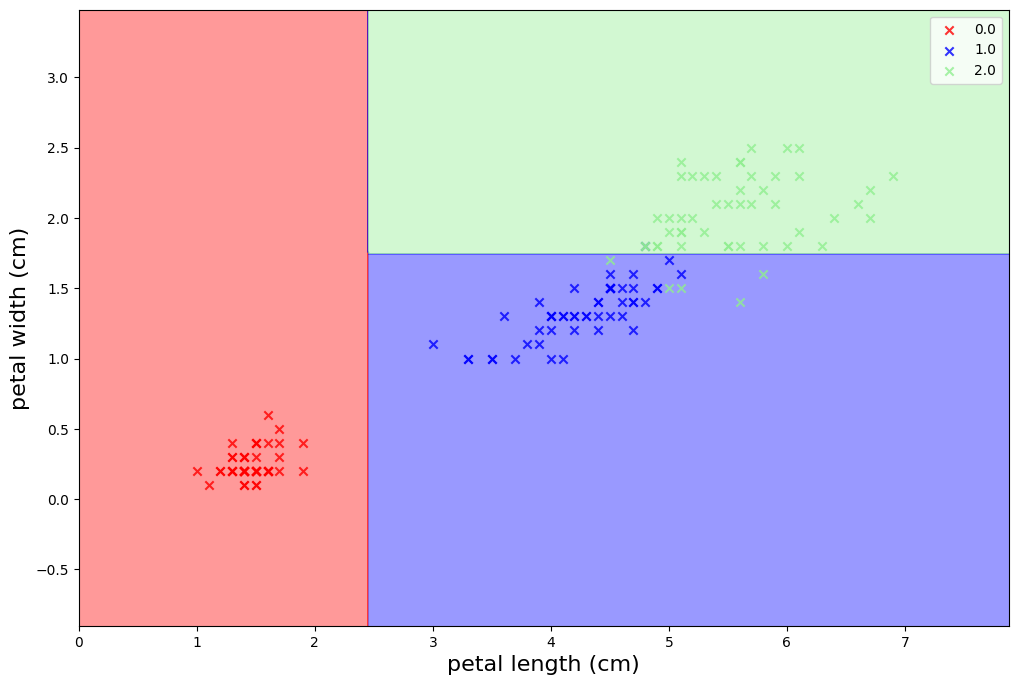

In [9]:
from utils import plot_decision_regions

plot_decision_regions(X, y, classifier=tree_clf)


<p><img src="https://drive.google.com/uc?id=15kUHhYRxXlap6skLxn8lTZW60EzgZEth" style="width:1700px"></p>

<a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">scikit-learn doc</a>



<h2 id="1.2-DecisionTreeRegressor">1.2 <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html"><code>DecisionTreeRegressor</code></a><a class="anchor-link" href="https://kitt.lewagon.com/karr/data-lectures.kitt/05-ML_07-Ensemble-Methods.html?title=Ensemble+Methods&amp;program_id=10#1.2-DecisionTreeRegressor">¶</a></h2>



<p>Regression trees consist of predicting a continuous value. They are "grown" differently than classification trees.<br>

<img src="https://drive.google.com/uc?id=15qT_ZdPYUSBVuyjiIgMdpx7xIjVbhW99" style="margin:auto" width="1300"/></p>

<p><a href="https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw">John Starmer, 2019</a></p>



<h3 id="Growing-the-Regression-tree">Growing the Regression tree<a class="anchor-link" href="https://kitt.lewagon.com/karr/data-lectures.kitt/05-ML_07-Ensemble-Methods.html?title=Ensemble+Methods&amp;program_id=10#Growing-the-Regression-tree">¶</a></h3>



<p><img src="https://drive.google.com/uc?id=15dBpVBe0lMXW9zyCxAafxhT0tqlLKmo7" style="margin:auto" width="900"/></p>

<p><a href="https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw">John Starmer, 2019</a></p>


<ul>
<li>Select a threshold </li>
<li>Compute the <strong>SSR residuals</strong> between average and true values on both side</li>
<li>Compute weighted-average sum of SSR on both sides, weighted by number of datapoints</li>
</ul>
<p><img src="https://drive.google.com/uc?id=161miEuFtVIvECmFu6JTi5pBbngUuo78R" style="margin:auto" width="1300"/></p>

<p><a href="https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw">John Starmer, 2019</a></p>



<p>Compute residuals for next hypothetical threshold
<img src="https://drive.google.com/uc?id=15kzAmCrcVlH-UUAb-_nG8Q6xnA-6X-7q" style="margin:auto" width="1300"/></p>

<p><a href="https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw">John Starmer, 2019</a></p>


<p>The threshold that minimizes residuals becomes the Root node of the tree</p>
<p><img src="https://drive.google.com/uc?id=15r-VyXdAKjoohkk95mfbxYahqKYmN18J" style="margin:auto" width="1300"/></p>

<p><a href="https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw">John Starmer, 2019</a></p>


<p><img src="https://drive.google.com/uc?id=1602ORKB0EBnAubQSlEetp56Et6eI3viE" style="margin:auto" width="1300"/></p>

<p><a href="https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw">John Starmer, 2019</a></p>


<p>We could further split the points below a dosage of 14.5, but we probably shouldnt. Why?</p>



<p>⚠️ We would be <strong>overfitting</strong>!</p>
<p><img src="https://drive.google.com/uc?id=15qVShonMz3NSTbl3YRbsoJwYLIvYi4fq" style="margin:auto" width="900"/></p>

<p><a href="https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw">John Starmer, 2019</a></p>


<p>Instead, stop splitting and use the average value of points within group to <strong>generalize</strong>.</p>
<p><img src="https://drive.google.com/uc?id=16-_OA1JoaPupXfjhRg2Wvn0l9PZHVC_t" style="margin:auto" width="1300"/></p>

<p><a href="https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw">John Starmer, 2019</a></p>


<h3 id="⚠️-Controlling-overfitting">⚠️ Controlling overfitting<a class="anchor-link" href="https://kitt.lewagon.com/karr/data-lectures.kitt/05-ML_07-Ensemble-Methods.html?title=Ensemble+Methods&amp;program_id=10#%E2%9A%A0%EF%B8%8F-Controlling-overfitting">¶</a></h3><ul>
<li><strong>Decision trees must be tuned!!</strong></li>
<li>Default parameters will almost certainly overfit</li>
<li>Control split</li>
<li>Control tree depth</li>
</ul>



<h4 id="min_samples_split"><code>min_samples_split</code></h4><ul>
<li>Specify the minimum number of samples required to split an internal node</li>
<li>In the example, <code>min_samples_split</code> is set to 7</li>
</ul>
<p><img  src="https://drive.google.com/uc?id=15qT_ZdPYUSBVuyjiIgMdpx7xIjVbhW99" style="margin:auto" width="1300"/></p>

<p><a href="https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw">John Starmer, 2019</a></p>


<h4 id="max_depth"><code>max_depth</code><a class="anchor-link" href="https://kitt.lewagon.com/karr/data-lectures.kitt/05-ML_07-Ensemble-Methods.html?title=Ensemble+Methods&amp;program_id=10#max_depth">¶</a></h4><ul>
<li>The maximum depth of the tree</li>
</ul>



<h4 id="min_samples_leaf"><code>min_samples_leaf</code><a class="anchor-link" href="https://kitt.lewagon.com/karr/data-lectures.kitt/05-ML_07-Ensemble-Methods.html?title=Ensemble+Methods&amp;program_id=10#min_samples_leaf">¶</a></h4><ul>
<li>The minimum number of samples required to be at a leaf node.</li>
</ul>



<h2 id="💻--Variance-illustrated">💻  Variance illustrated<a class="anchor-link" href="https://kitt.lewagon.com/karr/data-lectures.kitt/05-ML_07-Ensemble-Methods.html?title=Ensemble+Methods&amp;program_id=10#%F0%9F%92%BB--Variance-illustrated">¶</a></h2>


#### Regression
We will use a dataset of <span style="color:teal">**Greenhouse Temperatures** </span>to illustrate regression with DecisionTrees.<br>

<img src="https://drive.google.com/uc?id=15xoFfJBG6HBvuWyv0L0Qpc8KMhl34aSs" style="width:1500px">


In [10]:
import pandas as pd
reg_data = pd.read_csv('Lecture_data/greenhouse.csv')
reg_data

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Average Temperature
0,0.98,514.5,294.0,110.25,7.0,0.0,18.440
1,0.98,514.5,294.0,110.25,7.0,0.0,18.440
2,0.98,514.5,294.0,110.25,7.0,0.0,18.440
3,0.98,514.5,294.0,110.25,7.0,0.0,18.440
4,0.90,563.5,318.5,122.50,7.0,0.0,24.560
...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,0.4,19.640
764,0.62,808.5,367.5,220.50,3.5,0.4,16.710
765,0.62,808.5,367.5,220.50,3.5,0.4,16.775
766,0.62,808.5,367.5,220.50,3.5,0.4,16.545


In [11]:
from sklearn.model_selection import train_test_split

reg_X = reg_data[['Overall Height', 'Glazing Area']]
reg_y = reg_data['Average Temperature']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(reg_X, reg_y, train_size=0.7, random_state=5)


In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

tree = DecisionTreeRegressor()

cv_results = cross_validate(tree, reg_X, reg_y, scoring = "neg_mean_squared_error", cv=60)

print('std: ', cv_results['test_score'].std())
print('mean: ', cv_results['test_score'].mean()*-1)

std:  11.675169942084784
mean:  13.236938524725568


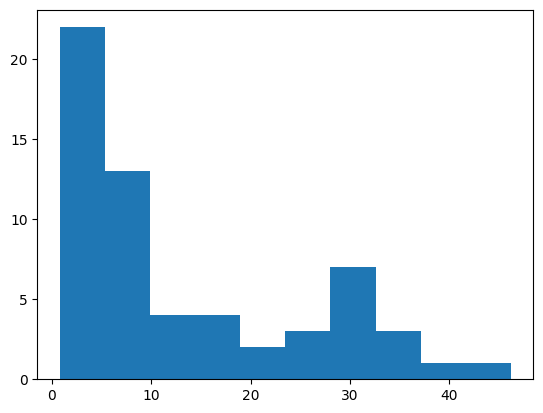

In [13]:
plt.hist(cv_results['test_score']*-1);

#### Classification

<span style="color:teal">**We will use a dataset of pH vs water chemistry for classification** </span><br>

<img src="https://drive.google.com/uc?id=15ghba_8Hus87XNDl5YoMuTBMpCItXy8Q" style="width:1500px">

In [14]:
class_data = pd.read_csv('Lecture_data/geochem.csv')
class_data

,Ca_ICP_PCT,K_ICP_PCT,pH
0,2.72,0.03,2
1,0.35,0.08,0
2,0.40,0.08,0
3,0.59,0.04,0
4,2.39,0.03,2
...,...,...,...
834,0.50,0.17,0
835,0.63,0.23,1
836,0.55,0.20,0
837,0.31,0.03,0


In [15]:
X = class_data.drop(columns='pH')
y = class_data['pH']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=3)

In [ ]:
plt.scatter(X_train['Ca_ICP_PCT'], X_train['K_ICP_PCT'], c=y_train)
plt.xlabel('Ca_ICP_PCT')
plt.ylabel('K_ICP_PCT');

In [16]:
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import interact, IntSlider
from utils import plot_decision_regions

@interact(max_depth=IntSlider(min=1, max=15, step=1, value=3))
def plot_classifier(max_depth):
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train.values, y_train.values)
    print(f'Test Accuracy: {clf.score(X_test.values, y_test.values)}')
    plot_decision_regions(X_train, y_train, classifier=clf, y_pad=.0,x_pad=.2)
    plt.plot()

interactive(children=(IntSlider(value=3, description='max_depth', max=15, min=1), Output()), _dom_classes=('wi…


<h2 id="Pros-and-cons-of-Decision-Trees">Pros and cons of Decision Trees<a class="anchor-link" href="https://kitt.lewagon.com/karr/data-lectures.kitt/05-ML_07-Ensemble-Methods.html?title=Ensemble+Methods&amp;program_id=10#Pros-and-cons-of-Decision-Trees">¶</a></h2><p>👍 Advantages</p>
<ul>
<li>No scaling necessary</li>
<li>Resistant to outliers</li>
<li>Intuitive and interpretable</li>
<li>Allow feature selection (see gini-based <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_"><code>feature_importance_</code></a>)</li>
<li>Non-Linear modelisation</li>
</ul>



<p>👎 Disadvantages</p>
<ul>
<li>High variance (i.e small change in data has a big change in the tree structure)</li>
<li>Long training time if grown up to max depth <span class="MathJax_Preview" style="color: inherit;"></span><span class="mjx-chtml MathJax_CHTML" data-mathml='&lt;math xmlns="http://www.w3.org/1998/Math/MathML"&gt;&lt;mi&gt;O&lt;/mi&gt;&lt;mo stretchy="false"&gt;(&lt;/mo&gt;&lt;msub&gt;&lt;mi&gt;N&lt;/mi&gt;&lt;mrow class="MJX-TeXAtom-ORD"&gt;&lt;mi&gt;o&lt;/mi&gt;&lt;mi&gt;b&lt;/mi&gt;&lt;mi&gt;s&lt;/mi&gt;&lt;/mrow&gt;&lt;/msub&gt;&lt;mo&gt;&amp;#x2217;&lt;/mo&gt;&lt;msub&gt;&lt;mi&gt;m&lt;/mi&gt;&lt;mrow class="MJX-TeXAtom-ORD"&gt;&lt;mi&gt;f&lt;/mi&gt;&lt;mi&gt;e&lt;/mi&gt;&lt;mi&gt;a&lt;/mi&gt;&lt;mi&gt;t&lt;/mi&gt;&lt;/mrow&gt;&lt;/msub&gt;&lt;mo&gt;&amp;#x2217;&lt;/mo&gt;&lt;mi&gt;d&lt;/mi&gt;&lt;mi&gt;e&lt;/mi&gt;&lt;mi&gt;p&lt;/mi&gt;&lt;mi&gt;t&lt;/mi&gt;&lt;mi&gt;h&lt;/mi&gt;&lt;mo stretchy="false"&gt;)&lt;/mo&gt;&lt;/math&gt;' id="MathJax-Element-4-Frame" role="presentation" style="font-size: 116%; position: relative;" tabindex="0"><span aria-hidden="true" class="mjx-math" id="MJXc-Node-20"><span class="mjx-mrow" id="MJXc-Node-21"><span class="mjx-mi" id="MJXc-Node-22"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.496em; padding-bottom: 0.311em;">O</span></span><span class="mjx-mo" id="MJXc-Node-23"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.434em; padding-bottom: 0.619em;">(</span></span><span class="mjx-msubsup" id="MJXc-Node-24"><span class="mjx-base" style="margin-right: -0.085em;"><span class="mjx-mi" id="MJXc-Node-25"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.434em; padding-bottom: 0.249em; padding-right: 0.085em;">N</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.219em; padding-right: 0.071em;"><span class="mjx-texatom" id="MJXc-Node-26" style=""><span class="mjx-mrow" id="MJXc-Node-27"><span class="mjx-mi" id="MJXc-Node-28"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.249em; padding-bottom: 0.311em;">o</span></span><span class="mjx-mi" id="MJXc-Node-29"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.496em; padding-bottom: 0.311em;">b</span></span><span class="mjx-mi" id="MJXc-Node-30"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.249em; padding-bottom: 0.311em;">s</span></span></span></span></span></span><span class="mjx-mo MJXc-space2" id="MJXc-Node-31"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.188em; padding-bottom: 0.311em;">∗</span></span><span class="mjx-msubsup MJXc-space2" id="MJXc-Node-32"><span class="mjx-base"><span class="mjx-mi" id="MJXc-Node-33"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.249em; padding-bottom: 0.311em;">m</span></span></span><span class="mjx-sub" style="font-size: 70.7%; vertical-align: -0.23em; padding-right: 0.071em;"><span class="mjx-texatom" id="MJXc-Node-34" style=""><span class="mjx-mrow" id="MJXc-Node-35"><span class="mjx-mi" id="MJXc-Node-36"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.496em; padding-bottom: 0.496em; padding-right: 0.06em;">f</span></span><span class="mjx-mi" id="MJXc-Node-37"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.249em; padding-bottom: 0.311em;">e</span></span><span class="mjx-mi" id="MJXc-Node-38"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.249em; padding-bottom: 0.311em;">a</span></span><span class="mjx-mi" id="MJXc-Node-39"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.434em; padding-bottom: 0.311em;">t</span></span></span></span></span></span><span class="mjx-mo MJXc-space2" id="MJXc-Node-40"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.188em; padding-bottom: 0.311em;">∗</span></span><span class="mjx-mi MJXc-space2" id="MJXc-Node-41"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.496em; padding-bottom: 0.311em; padding-right: 0.003em;">d</span></span><span class="mjx-mi" id="MJXc-Node-42"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.249em; padding-bottom: 0.311em;">e</span></span><span class="mjx-mi" id="MJXc-Node-43"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.249em; padding-bottom: 0.496em;">p</span></span><span class="mjx-mi" id="MJXc-Node-44"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.434em; padding-bottom: 0.311em;">t</span></span><span class="mjx-mi" id="MJXc-Node-45"><span class="mjx-char MJXc-TeX-math-I" style="padding-top: 0.496em; padding-bottom: 0.311em;">h</span></span><span class="mjx-mo" id="MJXc-Node-46"><span class="mjx-char MJXc-TeX-main-R" style="padding-top: 0.434em; padding-bottom: 0.619em;">)</span></span></span></span><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>O</mi><mo stretchy="false">(</mo><msub><mi>N</mi><mrow class="MJX-TeXAtom-ORD"><mi>o</mi><mi>b</mi><mi>s</mi></mrow></msub><mo>∗</mo><msub><mi>m</mi><mrow class="MJX-TeXAtom-ORD"><mi>f</mi><mi>e</mi><mi>a</mi><mi>t</mi></mrow></msub><mo>∗</mo><mi>d</mi><mi>e</mi><mi>p</mi><mi>t</mi><mi>h</mi><mo stretchy="false">)</mo></math></span></span><script id="MathJax-Element-4" type="math/tex">O(N_{obs}*m_{feat}*depth)</script></li>
<li>Split data "orthogonally" to feature directions (use PCA upfront to "orient" data)</li>
</ul>



# Ensemble Methods
<br>
<center><img src="https://drive.google.com/uc?id=15vBdptV3FxSd9aT4B06yiXxWW-m5hBRq" style="width:900px;"><br>
Image generated with <a href="https://openai.com/blog/dall-e/">DALL-E</a><br>

Prompt: A photo of a forest in autumn with colorful leaves and many animals in the branches. <br>© Cédric John, 2022.</center>


# Boostrap Aggregation

<p>Bootstrap aggregating, also known as Bagging, is the aggregation of multiple versions of a model.</p>
<ul>
<li>It is a <strong>parallel</strong> ensemble method</li>
<li>The aim of bagging is to <strong>reduce variance</strong></li>
<li>Each version of the model is called a <strong>weak learner</strong></li>
<li>Weak learners are trained on <strong>boostrapped</strong> samples of the dataset</li>
</ul>
<p><img align="center" src="https://drive.google.com/uc?id=15karOVgKRq-AYmpfPcTW3oNQjesoJRPB" style="margin:auto" width="900"/></p>

<a href="https://medium.com/analytics-vidhya/ensemble-models-bagging-boosting-c33706db0b0b">Silipo, 2020</a>



<h2 id="Bootstrapping">Bootstrapping</h2><ul>
<li>Generating "bootstrapped" samples from the given dataset</li>
<li>The samples are created by randomly drawing the data points with replacement.</li>
<li>Features can also be randomly filtered to increase bagging diversity</li>
</ul>
<p><img align="center" src="https://drive.google.com/uc?id=15e76Tpt-yb71fJ-1G0TdHQ7yP1iIdFzE" style="margin:auto" width="1000"/></p>

<a href="https://towardsdatascience.com/seeing-the-forest-for-the-trees-an-introduction-to-random-forest-41a24fc842ac">Firmin, 2019</a>



<h2 id="Random-Forests-=-Bagged-Trees">Random Forests = Bagged Trees</h2><p>Random Forests are a Bagged ensemble of Decision trees.</p>

<p><img align="center" src="https://drive.google.com/uc?id=15gn_isa8pgkTkvRwowwR_QmrujKAvCfY" style="margin:auto" width="1000"/></p>

<a href="https://towardsdatascience.com/seeing-the-forest-for-the-trees-an-introduction-to-random-forest-41a24fc842ac">Firmin, 2019</a>


<p>Prediction are averaged (for regression) or voted (classification)</p>
<p><img align="center" src="https://drive.google.com/uc?id=162UCDj9_FNbvR2dNLiRBNTMZcGBW2GVS" style="margin:auto" width="1000"/></p>

<a href="https://www.researchgate.net/publication/301638643_Electromyographic_Patterns_during_Golf_Swing_Activation_Sequence_Profiling_and_Prediction_of_Shot_Effectiveness">Verikas et al, 2016</a>


<h3 id="💻-Sklearn-RandomForestRegressor-and-Classifier">💻 Sklearn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html">RandomForestRegressor</a> and <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">Classifier</a><a class="anchor-link" href="https://kitt.lewagon.com/karr/data-lectures.kitt/05-ML_07-Ensemble-Methods.html?title=Ensemble+Methods&amp;program_id=10#%F0%9F%92%BB-Sklearn-RandomForestRegressor-and-Classifier">¶</a></h3>


In [17]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100)

cv_results = cross_validate(forest, reg_X, reg_y, scoring = "neg_mean_squared_error", cv=10)

print(cv_results['test_score'])
print('mean mse: ',-1*cv_results['test_score'].mean())
print('std mse: ', cv_results['test_score'].std())


[-28.82100136  -9.74027076 -13.2682221  -13.70098333 -10.17123487
 -14.67325253  -9.63673062 -13.45545066 -13.30324486  -8.29101159]
mean mse:  13.506140267566124
std mse:  5.509253048658625


In [18]:
from sklearn.ensemble import RandomForestClassifier

@interact(max_depth=IntSlider(min=1, max=30, step=1, value=3))
def plot_classifier(max_depth):
    clf = RandomForestClassifier(max_depth=max_depth)
    clf.fit(X_train.values, y_train.values)
    print(f'Test Accuracy: {clf.score(X_test.values, y_test.values)}')
    plot_decision_regions(X_train, y_train, classifier=clf, y_pad=.0,x_pad=.2)
    plt.plot()

interactive(children=(IntSlider(value=3, description='max_depth', max=30, min=1), Output()), _dom_classes=('wi…


<h2 id="💻-Bagging-any-algorithm-!">💻 Bagging any algorithm !<a class="anchor-link" href="https://kitt.lewagon.com/karr/data-lectures.kitt/05-ML_07-Ensemble-Methods.html?title=Ensemble+Methods&amp;program_id=10#%F0%9F%92%BB-Bagging-any-algorithm-!">¶</a></h2><p>Bagging can be implemented on any algorithm using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html"><code>BaggingRegressor</code></a> and <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html"><code>BaggingClassifier</code></a></p>


In [19]:

from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

bagged_model = BaggingRegressor(linear_model, n_estimators=50)

cv_results = cross_validate(bagged_model, reg_X, reg_y, scoring = "neg_mean_squared_error", cv=10)
print('mean mse: ',-1*cv_results['test_score'].mean())
print('std dev: ', cv_results['test_score'].std())


mean mse:  13.420640034445446
std dev:  3.893642769818285



<h4 id="Out-of-Bag-samples">Out-of-Bag samples<a class="anchor-link" href="https://kitt.lewagon.com/karr/data-lectures.kitt/05-ML_07-Ensemble-Methods.html?title=Ensemble+Methods&amp;program_id=10#Out-of-Bag-samples">¶</a></h4><p>Sample not "drawn" by the bagging can be used to give a pseudo "test" score</p>


In [20]:
bagged_model = BaggingRegressor(
    linear_model,
    n_estimators=50,
    oob_score=True
)

bagged_model.fit(reg_X,reg_y).oob_score_


0.8631981369099049


<h3 id="Pros-and-cons-of-Bagging">Pros and cons of Bagging<a class="anchor-link" href="https://kitt.lewagon.com/karr/data-lectures.kitt/05-ML_07-Ensemble-Methods.html?title=Ensemble+Methods&amp;program_id=10#Pros-and-cons-of-Bagging">¶</a></h3>



<p>👍 Advantages:</p>
<ul>
<li>Reduces variance/overfitting</li>
<li>Can be applied to any model</li>
</ul>



<p>👎 Disadvantages</p>
<ul>
<li>Complex structure</li>
<li>High training time</li>
<li>Disregards the performance of individual sub-models</li>
</ul>



<h1 id="3.-Boosting">3. Boosting<a class="anchor-link" href="https://kitt.lewagon.com/karr/data-lectures.kitt/05-ML_07-Ensemble-Methods.html?title=Ensemble+Methods&amp;program_id=10#3.-Boosting">¶</a></h1>



<p>Boosting is a sequential ensemble method made up of weak learners that learn from their predecessor's mistakes.</p>
<ul>
<li>It is a <strong>sequential</strong> ensemble method</li>
<li>The aim of boosting is to <strong>reduce bias</strong></li>
<li>Focuses on the observations that are harder to predict</li>
<li>The best weak learners are given more weight in the final vote</li>
</ul>
<p><img align="center" src="https://drive.google.com/uc?id=15karOVgKRq-AYmpfPcTW3oNQjesoJRPB" style="margin:auto" width="1000"/></p>

<a href="https://medium.com/analytics-vidhya/ensemble-models-bagging-boosting-c33706db0b0b">Silipo, 2020</a>



<h2 >AdaBoost (Adaptative Boosting)</h2><p><a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html"><code>AdaBoostRegressor</code></a> and <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html"><code>AdaBoostClassifier</code></a></p>

<p><strong>One implementation</strong> of boosting that works particularly well with trees.</p>
<p><img align="center" src="https://drive.google.com/uc?id=15xeV5WyvNmkNX0LpdW1zImAjJZ7TbFdC" style="margin:auto" width="1300"/></p>

<a href="https://chrisalbon.com/code/machine_learning/trees_and_forests/adaboost_classifier/">Albon, 2017</a>



<h3 id="💻-AdaBoosted-Trees-in-Sklearn">💻 AdaBoosted Trees in Sklearn<a class="anchor-link" href="https://kitt.lewagon.com/karr/data-lectures.kitt/05-ML_07-Ensemble-Methods.html?title=Ensemble+Methods&amp;program_id=10#%F0%9F%92%BB-AdaBoosted-Trees-in-Sklearn">¶</a></h3>


In [21]:

from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3))

cv_results = cross_validate(adaboost, reg_X, reg_y, scoring = "neg_mean_squared_error", cv=10)

print('mean mse: ',-1*cv_results['test_score'].mean())
print('std dev: ', cv_results['test_score'].std())



mean mse:  13.912304163814445
std dev:  5.851788866583492


In [22]:
from sklearn.ensemble import AdaBoostClassifier

@interact(n_estimators=[10, 30, 50,100], max_depth=IntSlider(min=1, max=30, step=1, value=2))
def plot_classifier(n_estimators, max_depth):
    model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),
                               n_estimators=n_estimators)
    model.fit(X_train.values, y_train.values)
    print(f'Test Accuracy: {model.score(X_test.values, y_test.values)}')
    plot_decision_regions(X_train, y_train, classifier=model,  y_pad=.0,x_pad=.2)

interactive(children=(Dropdown(description='n_estimators', options=(10, 30, 50, 100), value=10), IntSlider(val…


<h2 id="3.2-Gradient-Boosting-🔥">3.2 Gradient Boosting 🔥<a class="anchor-link" href="https://kitt.lewagon.com/karr/data-lectures.kitt/05-ML_07-Ensemble-Methods.html?title=Ensemble+Methods&amp;program_id=10#3.2-Gradient-Boosting-%F0%9F%94%A5">¶</a></h2><ul>
<li>Only implemented for trees</li>
<li>Generally more performant than AdaBoost</li>
</ul>



<p>Instead of updating the weights of observations misclassified...</p>
<ol>
<li>Recursively fit each weak-learner on the <strong>residuals</strong> of the previous one</li>
<li>Then <strong>adds</strong> all the predictions of each weak learners (for regression)</li>
</ol>



<p>For classification, ~ similar principle but in the logit space (if loss chosen is log-loss)</p>
<p>📚 Read sklearn <a href="https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting">user guide</a></p>


In [23]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(
    n_estimators=100, 
    learning_rate=0.1
)

In [24]:
model.fit(X_train_reg, y_train_reg)
print(f'Test Accuracy: {model.score(X_test_reg, y_test_reg)}')

Test Accuracy: 0.8812411112352591


### XGBOOST

* Extreme Gradient Tree Boosting
* Dedicated library, optimized for this task
* Nice features inspired from Deep Learning

<a href="https://xgboost.readthedocs.io/en/latest/">See the XGBOOST Documentation</a>

In [26]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

xgb_reg = XGBRegressor(early_stopping_rounds=15,
    eval_metric=mean_squared_error)

xgb_reg.fit(
    X_train_reg, y_train_reg,
    # evaluate loss at each iteration
    eval_set=[(X_test_reg, y_test_reg)], 
) 

[0]	validation_0-rmse:7.10485	validation_0-mean_squared_error:50.47894
[1]	validation_0-rmse:5.50202	validation_0-mean_squared_error:30.27219
[2]	validation_0-rmse:4.50714	validation_0-mean_squared_error:20.31434
[3]	validation_0-rmse:3.92712	validation_0-mean_squared_error:15.42224
[4]	validation_0-rmse:3.60967	validation_0-mean_squared_error:13.02975
[5]	validation_0-rmse:3.44494	validation_0-mean_squared_error:11.86760
[6]	validation_0-rmse:3.36286	validation_0-mean_squared_error:11.30881
[7]	validation_0-rmse:3.32330	validation_0-mean_squared_error:11.04431
[8]	validation_0-rmse:3.30487	validation_0-mean_squared_error:10.92219
[9]	validation_0-rmse:3.29668	validation_0-mean_squared_error:10.86811
[10]	validation_0-rmse:3.29331	validation_0-mean_squared_error:10.84592
[11]	validation_0-rmse:3.29215	validation_0-mean_squared_error:10.83822
[12]	validation_0-rmse:3.29192	validation_0-mean_squared_error:10.83677
[13]	validation_0-rmse:3.29207	validation_0-mean_squared_error:10.83773
[1

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=15,
             enable_categorical=False,
             eval_metric=<function mean_squared_error at 0x124bf80e0>,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)


<h2 id="Pros-and-cons-of-boosting">Pros and cons of boosting<a class="anchor-link" href="https://kitt.lewagon.com/karr/data-lectures.kitt/05-ML_07-Ensemble-Methods.html?title=Ensemble+Methods&amp;program_id=10#Pros-and-cons-of-boosting">¶</a></h2>



<p>👍 Advantages:</p>
<ul>
<li>Strong sub-models have more influence in final decision</li>
<li>Reduce bias</li>
</ul>



<p>👎 Disadvantages:</p>
<ul>
<li>Computationally expensive (sequential)</li>
<li>Easily overfit</li>
<li>Sensitive to outliers (too much time spent trying to correctly predict them)</li>
</ul>



<h2 id="Ensemble-methods-recap">Ensemble methods recap</h2><p>Ensemble learning combines several base algorithms (e.g. Decision trees) to form one optimized predictive algorithm. Ensemble methods can be broken down into two categories:</p>
<ul>
<li><strong>Parallel Learners</strong>:  different models are trained in parallel and their predictions are aggregated (e.g. Random Forest)</li>
</ul>
<ul>
<li><strong>Sequential Learners</strong>: different models are trained sequentially and the mistakes of previous models are learned by their successors (e.g. Boosted trees)</li>
</ul>

<p><img align="center" src="https://drive.google.com/uc?id=15karOVgKRq-AYmpfPcTW3oNQjesoJRPB" style="margin:auto" width="1000"/></p>

<a href="https://medium.com/analytics-vidhya/ensemble-models-bagging-boosting-c33706db0b0b">Silipo, 2020</a>

# Models Stacking
<br>

<center><img src="https://drive.google.com/uc?id=163V9vbFGzIyUZGwy3xCA7A0J_gLrVVXj" style="width:900px;"><br>

 © Cédric John, 2022; Image generated with <a href="https://openai.com/blog/dall-e/">DALL-E</a><br>
<br>Prompt: A very high stack of delicious looking pancakes with glass-looking mapple sirup, creamy butter, and colorful rasberries, soft lighting.</center>

## Stacking


<p>Stacking consists of training different algorithms and aggregating their predictions.</p>
<ul>
<li>Different algorithms capture different structures of data</li>
<li>Combining sometimes enhances the predictive power</li>
<li>The results are aggregated by voting (classification) or averaging (regression)</li>
</ul>



<h3 id="Simple-aggregation">Simple aggregation<a class="anchor-link" href="https://kitt.lewagon.com/karr/data-lectures.kitt/05-ML_07-Ensemble-Methods.html?title=Ensemble+Methods&amp;program_id=10#Simple-aggregation">¶</a></h3><p>
sklearn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html">VotingClassifier</a> and <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html">VotingRegressor</a></p>



<p><img align="center" src="https://drive.google.com/uc?id=15iJYy1CHpzkPFJo0OO4K9u0K6RjzHIr3" style="margin:auto" width="1300"/></p>

<a href="https://www.oreilly.com/library/view/hands-on-machine-learning/9781098125967/">Géron, 2017-2022</a>

Test Accuracy: 0.7142857142857143


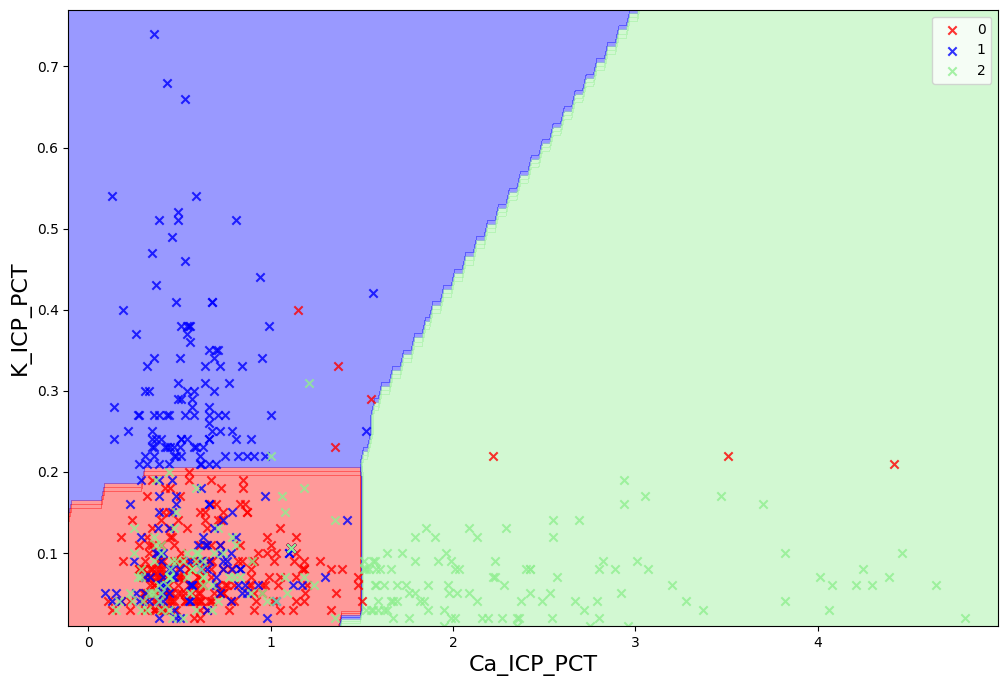

In [27]:

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

forest = RandomForestClassifier(max_depth=2)
logreg = LogisticRegression()

ensemble = VotingClassifier(
    estimators = [("rf", forest),("lr", logreg)],
    voting = 'soft', # to use predict_proba of each classifier before voting
    weights = [1,1] # to equally weight forest and logreg in the vote
)
ensemble.fit(X_train.values, y_train.values)
print(f'Test Accuracy: {ensemble.score(X_test.values, y_test.values)}')
plot_decision_regions(X_train, y_train, classifier=ensemble,  y_pad=.0,x_pad=.2)


<h3 id="Multi-layer-stacking!">Multi-layer stacking!<a class="anchor-link" href="https://kitt.lewagon.com/karr/data-lectures.kitt/05-ML_07-Ensemble-Methods.html?title=Ensemble+Methods&amp;program_id=10#Multi-layer-stacking!">¶</a></h3><p>sklearn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html">StackingClassifier</a> and <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html">StackingRegressor</a></p>
<p>Train a <strong>final estimator</strong> on the predictions of the previous ones</p>


Test Accuracy: 0.6964285714285714


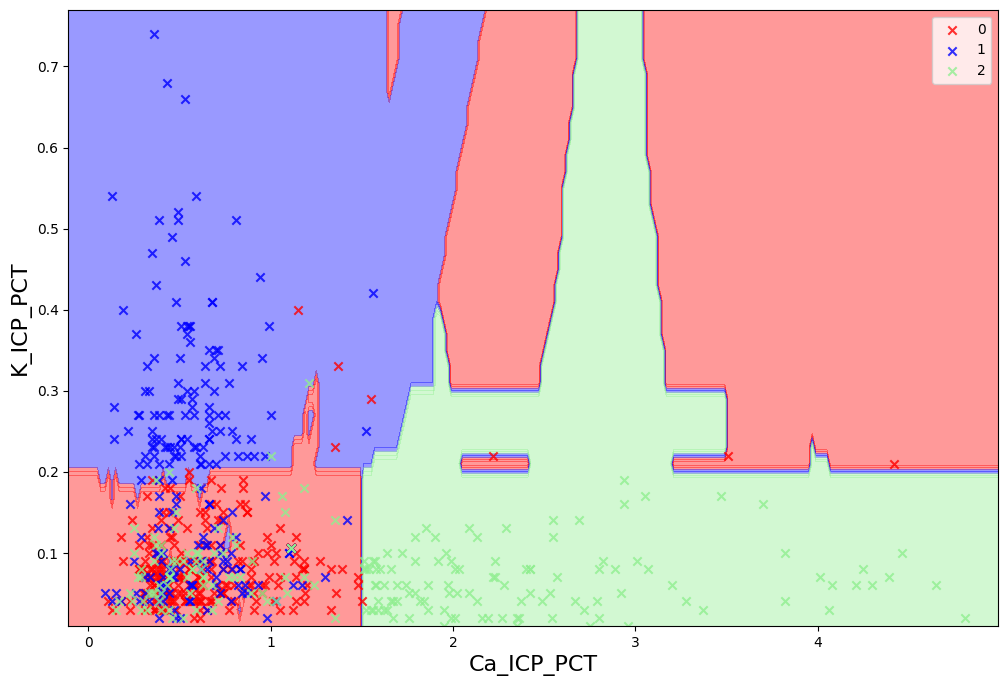

In [28]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

ensemble = StackingClassifier(
    estimators = [("rf", RandomForestClassifier(max_depth=2)),
                  ("knn", KNeighborsClassifier(n_neighbors=10))],
    final_estimator = LogisticRegression())

ensemble.fit(X_train.values, y_train.values)
print(f'Test Accuracy: {ensemble.score(X_test.values, y_test.values)}')
plot_decision_regions(X_train, y_train, classifier=ensemble, y_pad=.0,x_pad=.2)


# Suggested Resources

## 📺 Videos 
#### Short videos from my Undegraduate Machine Learning Classes:
* 📼 <a href="https://youtu.be/FHk46klXgZs?list=PLZzjCZ3QdgQCcRIwQdd-_cJNAUgiEBB_n">Decision Trees</a>
* 📼 <a href="https://youtu.be/v15RrzYaXqY?list=PLZzjCZ3QdgQCcRIwQdd-_cJNAUgiEBB_n">RandomForest</a>

## 📚 Further Reading 
* 📖 <a href="https://towardsdatascience.com/ensemble-methods-in-machine-learning-what-are-they-and-why-use-them-68ec3f9fef5f">Ensemble Methods in Machine Learning: What are They and Why Use Them?</a> by Evan Lutins
* 📖 <a href="https://machinelearningmastery.com/tour-of-ensemble-learning-algorithms/">A Gentle Introduction to Ensemble Learning Algorithms</a> by Jason Brown, 2021
* 📖 <a href="https://towardsdatascience.com/understanding-random-forest-58381e0602d2">Understanding Random Forest - How the Algorithm Works and Why it Is So Effective</a> by Tony Yiu, 2019


# 💻🐍 Time to Code ! 